<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/SIR_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=e976f2f68c29eb031a908c9da565f32dec3bc89545f185f0f913259e0ec79d05
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [3]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [5]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [6]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [7]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [8]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [9]:
data = np.array(S_value.iloc[0]).reshape(100,1)

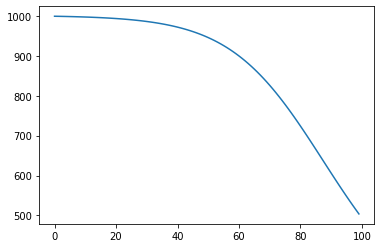

In [10]:
plt.plot(data)

In [93]:
train = data[0:70]
test = data[70:]

In [14]:
train

array([[999.        ],
       [998.85942836],
       [998.7090105 ],
       [998.54806169],
       [998.37585031],
       [998.19159476],
       [997.99446005],
       [997.78355445],
       [997.5579257 ],
       [997.31655709],
       [997.0583633 ],
       [996.78218613],
       [996.4867896 ],
       [996.17085524],
       [995.83297691],
       [995.47165531],
       [995.08529234],
       [994.67218504],
       [994.23051934],
       [993.75836347],
       [993.2536611 ],
       [992.71422422],
       [992.13772567],
       [991.52169148],
       [990.8634929 ],
       [990.16033818],
       [989.40926423],
       [988.60712798],
       [987.75059766],
       [986.83614401],
       [985.86003136],
       [984.8183089 ],
       [983.70680183],
       [982.52110295],
       [981.25656437],
       [979.90828985],
       [978.47112744],
       [976.93966325],
       [975.30821564],
       [973.57083113],
       [971.72128098],
       [969.75306009],
       [967.65938708],
       [965

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [20]:
# define generator
n_input = 9
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
X,y = generator[0]

In [97]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu',return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [98]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 9, 64)             16896     
_________________________________________________________________
lstm_20 (LSTM)               (None, 9, 64)             33024     
_________________________________________________________________
lstm_21 (LSTM)               (None, 9, 32)             12416     
_________________________________________________________________
lstm_22 (LSTM)               (None, 9, 32)             8320      
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 73,809
Trainable params: 73,809
Non-trainable params: 0
__________________________________________________

In [99]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
61/61 [==============================] - 3s 41ms/step - loss: 0.1480
Epoch 2/50
61/61 [==============================] - 1s 19ms/step - loss: 0.0336
Epoch 3/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0046
Epoch 4/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 5/50
61/61 [==============================] - 1s 18ms/step - loss: 7.1186e-04
Epoch 6/50
61/61 [==============================] - 1s 17ms/step - loss: 3.6672e-04
Epoch 7/50
61/61 [==============================] - 1s 20ms/step - loss: 1.2728e-04
Epoch 8/50
61/61 [==============================] - 1s 19ms/step - loss: 2.1855e-04
Epoch 9/50
61/61 [==============================] - 1s 17ms/step - loss: 1.7746e-04
Epoch 10/50
61/61 [==============================] - 1s 17ms/step - loss: 6.9557e-05
Epoch 11/50
61/61 [==============================] - 1s 18ms/step - loss: 7.0083e-05
Epoch 12/50
61/61 [==============================] - 1s 18ms/step - loss: 1.1525e-04
Epoch

In [100]:
model.history.history.keys()

dict_keys(['loss'])

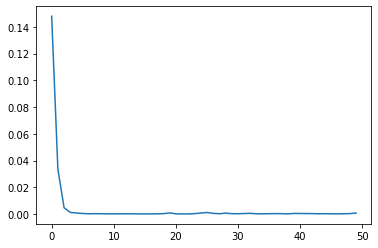

In [101]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [102]:
scaled_test

array([[-0.05303941],
       [-0.10788948],
       [-0.16451532],
       [-0.22287205],
       [-0.28290464],
       [-0.3445478 ],
       [-0.4077261 ],
       [-0.47235417],
       [-0.53833704],
       [-0.60557061],
       [-0.67394233],
       [-0.74333191],
       [-0.81361227],
       [-0.88465046],
       [-0.95630879],
       [-1.02844601],
       [-1.10091847],
       [-1.1735814 ],
       [-1.24629015],
       [-1.31890141],
       [-1.39127442],
       [-1.46327207],
       [-1.53476196],
       [-1.60561735],
       [-1.67571802],
       [-1.74495094],
       [-1.81321093],
       [-1.88040107],
       [-1.94643309],
       [-2.01122753]])

In [103]:
first_eval_batch = scaled_train[-9:]

In [104]:
first_eval_batch

array([[0.35794153],
       [0.31957536],
       [0.2794286 ],
       [0.23747266],
       [0.19368482],
       [0.14804881],
       [0.10055552],
       [0.05120359],
       [0.        ]])

In [105]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [106]:

model.predict(first_eval_batch)

array([[-0.07557888]], dtype=float32)

In [107]:
scaled_test

array([[-0.05303941],
       [-0.10788948],
       [-0.16451532],
       [-0.22287205],
       [-0.28290464],
       [-0.3445478 ],
       [-0.4077261 ],
       [-0.47235417],
       [-0.53833704],
       [-0.60557061],
       [-0.67394233],
       [-0.74333191],
       [-0.81361227],
       [-0.88465046],
       [-0.95630879],
       [-1.02844601],
       [-1.10091847],
       [-1.1735814 ],
       [-1.24629015],
       [-1.31890141],
       [-1.39127442],
       [-1.46327207],
       [-1.53476196],
       [-1.60561735],
       [-1.67571802],
       [-1.74495094],
       [-1.81321093],
       [-1.88040107],
       [-1.94643309],
       [-2.01122753]])

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [109]:
test_predictions

[array([-0.07557888], dtype=float32),
 array([-0.10947171], dtype=float32),
 array([-0.14020592], dtype=float32),
 array([-0.16767529], dtype=float32),
 array([-0.19190763], dtype=float32),
 array([-0.21281743], dtype=float32),
 array([-0.23051594], dtype=float32),
 array([-0.24528244], dtype=float32),
 array([-0.25760087], dtype=float32),
 array([-0.26876155], dtype=float32),
 array([-0.27596104], dtype=float32),
 array([-0.2822133], dtype=float32),
 array([-0.2876384], dtype=float32),
 array([-0.29229385], dtype=float32),
 array([-0.29621238], dtype=float32),
 array([-0.29947087], dtype=float32),
 array([-0.30215704], dtype=float32),
 array([-0.30436125], dtype=float32),
 array([-0.30615592], dtype=float32),
 array([-0.30752793], dtype=float32),
 array([-0.30870518], dtype=float32),
 array([-0.30970737], dtype=float32),
 array([-0.3105501], dtype=float32),
 array([-0.31124955], dtype=float32),
 array([-0.31182507], dtype=float32),
 array([-0.31229568], dtype=float32),
 array([-0.3126

In [110]:
true_predictions = scaler.inverse_transform(test_predictions)

In [111]:
true_predictions

array([[822.15460393],
       [816.58198606],
       [811.52870375],
       [807.01222325],
       [803.02797037],
       [799.59000582],
       [796.68003769],
       [794.25214749],
       [792.22676555],
       [790.39174123],
       [789.20800869],
       [788.18001972],
       [787.28803199],
       [786.52258836],
       [785.87830857],
       [785.34255046],
       [784.90089315],
       [784.53847964],
       [784.24340279],
       [784.01781863],
       [783.82425637],
       [783.65947707],
       [783.52091801],
       [783.40591355],
       [783.31128845],
       [783.23391157],
       [783.17089676],
       [783.11968131],
       [783.07797688],
       [783.04266213]])

In [112]:
test = pd.DataFrame(test)

In [113]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [114]:
test

,0,Predictions
0,825.860516,822.154604
1,816.842134,816.581986
2,807.531782,811.528704
3,797.936837,807.012223
4,788.066351,803.027970
5,777.931056,799.590006
6,767.543355,796.680038
7,756.917285,794.252147
8,746.068461,792.226766
9,735.013997,790.391741


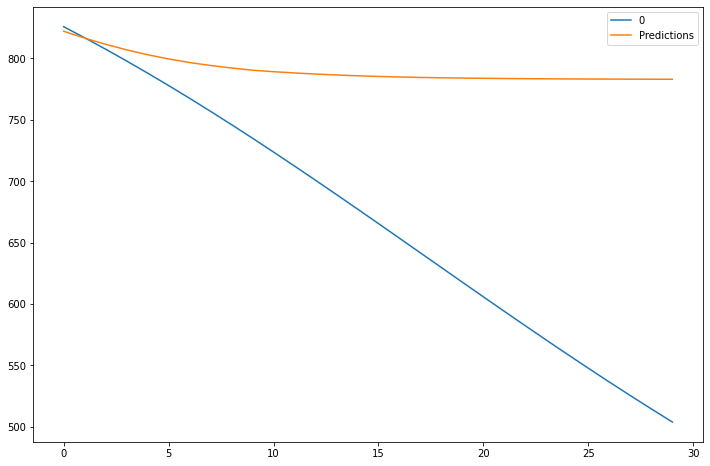

In [115]:
test.plot(figsize=(12,8))